In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

Matplotlib is building the font cache; this may take a moment.


In [32]:
# Charger le jeu de données Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# visualisation des donnees
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


nous remarquons que notre dataset est un constituer d'un ensemble de fleurs caracteriser chacunes par:
-la Longueur du sepal
-la Largeur du sepal
-la longueur du petal
-la largeur du petal


In [9]:
# Étape 1 : Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

Ici on observe les valeurs normalisees pour chacunes des colonnes d'attributs

In [10]:
# Étape 2 : Calcul des distances et construction du dendrogramme
Z = linkage(X_scaled, method='ward')

Ici on utilise la methode 'ward' pour fusionner les clusters c'est a dire on determine la variance des distances entre clusters pour lier deux clusters ou non.

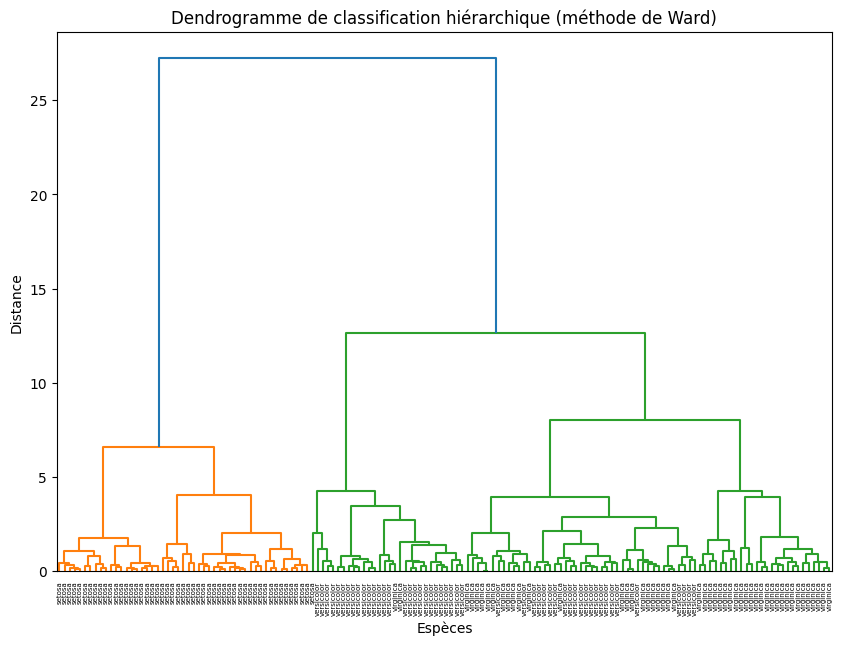

In [11]:
# Étape 3 : Visualisation du dendrogramme
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme de classification hiérarchique (méthode de Ward)")
dendrogram(Z, labels=iris.target_names[y])
plt.xlabel("Espèces")
plt.ylabel("Distance")
plt.show()

Nous remarquons que les donnees sont tres touffus ce qui rends la visualisation la lecture du graphique difficile. Essayons donc de dessiner notre dendogramme avec moins de features.

In [43]:
nbr_features = 100
X_red = X.iloc[0:nbr_features]
y_red = iris.target[:nbr_features] # ici on selectionne les cibles des 10 premiers features
# X_red.head(10)
# X_red.loc[100]

#  On vas normaliser nos valeurs de sorte que toutes les valeurs dans la colonne de "sepal length "
#  qui ont une valeur > a la valeur moyenne de la colonne soit remplaces par cette moyenne

u = X_red.loc[ : , 'sepal length (cm)'].mean() # calcul de la moyenne de la colonne "Sepal length"
# boucle permettant de normaliser les valeurs dans la colonne "sepal Length"
for i in range(len(X_red)):
    if X_red.loc[i, 'sepal length (cm)'] > u :
        X_red['sepal length (cm)'][i] = u
# fin de la boucle 
X_red.head(10) # visualisation du resultat sur les 100 prermiers features 


/tmp/ipykernel_8204/890211516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_red['sepal length (cm)'][i] = u


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.909091,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,4.700000,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,4.909091,3.6,1.4,0.2
5,4.909091,3.9,1.7,0.4
6,4.600000,3.4,1.4,0.3
7,4.909091,3.4,1.5,0.2
8,4.400000,2.9,1.4,0.2
9,4.900000,3.1,1.5,0.1


In [44]:
# mise des valeurs des features sous la meme echelle

X_scaled1 = scaler.fit_transform(X_red)
print(X_scaled1)

[[-6.50329222e-01  8.41837140e-01 -1.01297765e+00 -1.04211089e+00]
 [-6.80871147e-01 -2.07835104e-01 -1.01297765e+00 -1.04211089e+00]
 [-1.35279351e+00  2.12033793e-01 -1.08231219e+00 -1.04211089e+00]
 [-1.68875469e+00  2.09934449e-03 -9.43643106e-01 -1.04211089e+00]
 [-6.50329222e-01  1.05177159e+00 -1.01297765e+00 -1.04211089e+00]
 [-6.50329222e-01  1.68157493e+00 -8.04974023e-01 -6.86441647e-01]
 [-1.68875469e+00  6.31902691e-01 -1.01297765e+00 -8.64276271e-01]
 [-6.50329222e-01  6.31902691e-01 -9.43643106e-01 -1.04211089e+00]
 [-2.36067706e+00 -4.17769553e-01 -1.01297765e+00 -1.04211089e+00]
 [-6.80871147e-01  2.09934449e-03 -9.43643106e-01 -1.21994552e+00]
 [-6.50329222e-01  1.26170604e+00 -9.43643106e-01 -1.04211089e+00]
 [-1.01683233e+00  6.31902691e-01 -8.74308565e-01 -1.04211089e+00]
 [-1.01683233e+00 -2.07835104e-01 -1.01297765e+00 -1.21994552e+00]
 [-2.69663824e+00 -2.07835104e-01 -1.22098127e+00 -1.21994552e+00]
 [-4.15767233e-01  1.89150938e+00 -1.15164673e+00 -1.04211089e

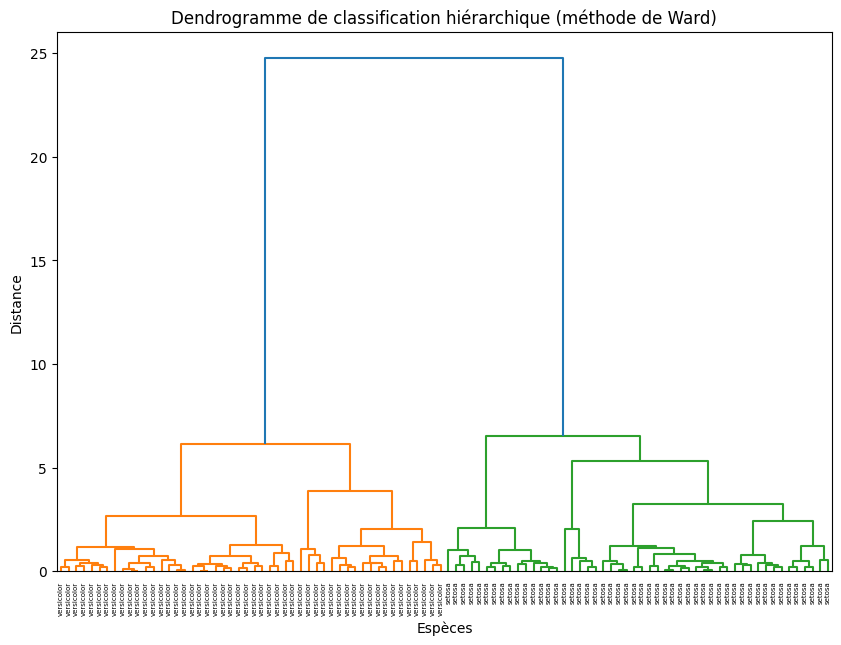

In [45]:

Z1 = linkage(X_scaled1, method='ward')
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme de classification hiérarchique (méthode de Ward)")
dendrogram(Z1, labels=iris.target_names[y_red])
plt.xlabel("Espèces")
plt.ylabel("Distance")
plt.show()

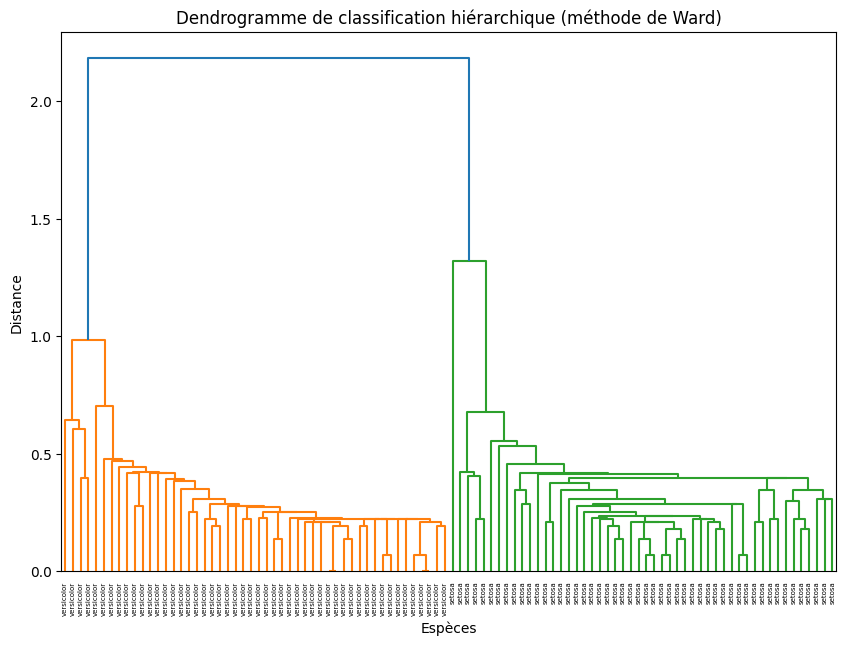

In [46]:
# EN UTILISANT LA CLASSIFICATION HIERARCHIQUE ASCENDANTE

Z1 = linkage(X_scaled1, method='single') # on change la valeur du parametre method. method = 'single'
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme de classification hiérarchique (méthode de Ward)")
dendrogram(Z1, labels=iris.target_names[y_red])
plt.xlabel("Espèces")
plt.ylabel("Distance")
plt.show()

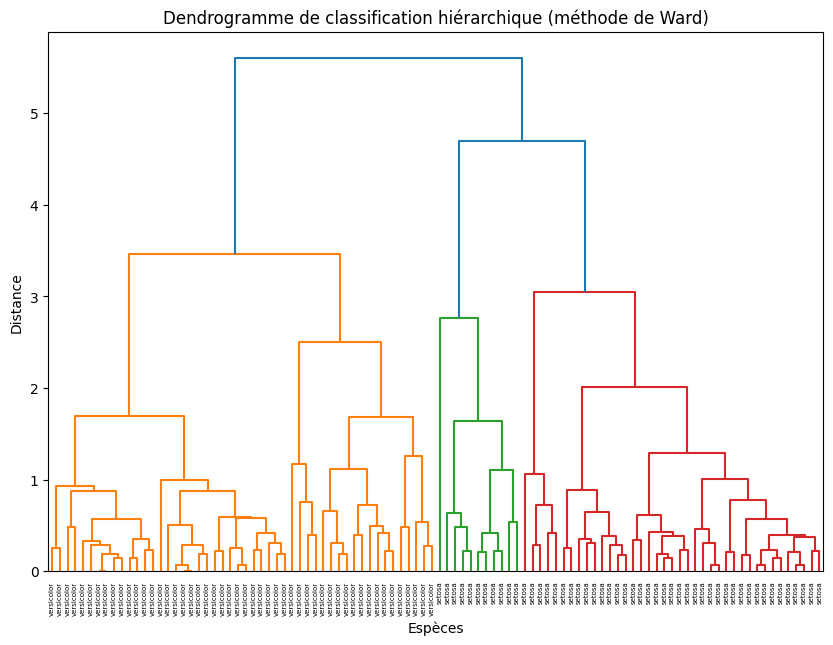

In [47]:
# EN UTILISANT LA CLASSIFICATION HIERARCHIQUE DESCENDANTE

Z1 = linkage(X_scaled1, method='complete') # on change la valeur du parametre method. method = 'complete'
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme de classification hiérarchique (méthode de Ward)")
dendrogram(Z1, labels=iris.target_names[y_red])
plt.xlabel("Espèces")
plt.ylabel("Distance")
plt.show()

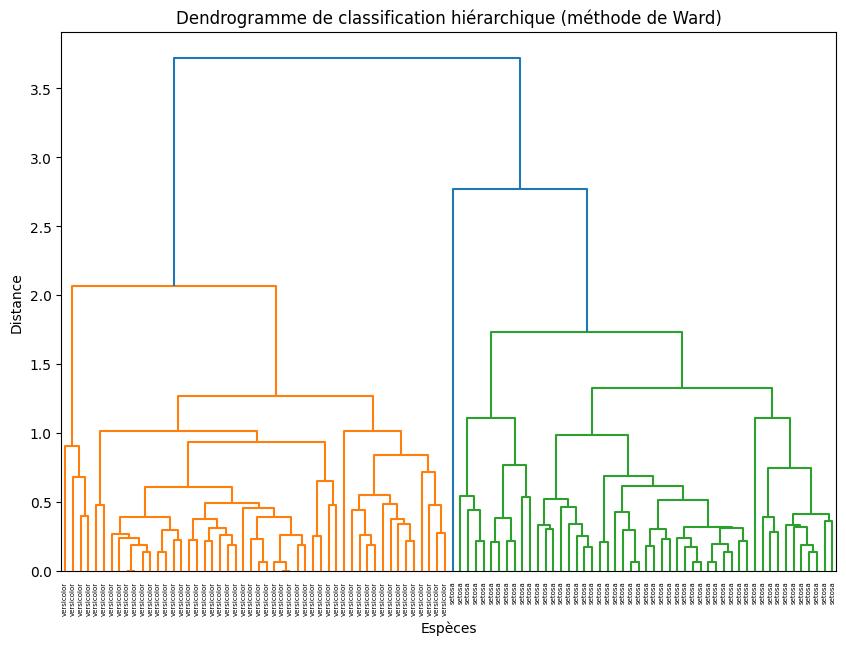

In [48]:
# EN UTILISANT LA CLASSIFICATION HIERARCHIQUE MOYENNE

Z1 = linkage(X_scaled1, method='average') # on change la valeur du parametre method. method = 'average'
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme de classification hiérarchique (méthode de Ward)")
dendrogram(Z1, labels=iris.target_names[y_red])
plt.xlabel("Espèces")
plt.ylabel("Distance")
plt.show()